# Understanding the Data

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import os;print(os.listdir())

['.ipynb_checkpoints', '01-911 Calls Data Capstone Project.ipynb', '02-911 Calls Data Capstone Project - Solutions.ipynb', '03-Finance Project.ipynb', '04-Finance Project - Solutions.ipynb', '911.csv', 'Mywork.ipynb', 'precipitation.html']


In [307]:
df=pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [308]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [310]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [311]:
df['lat'].value_counts().head()
df['lat'].nunique()

14579

In [312]:
df['lng'].value_counts().head()
df['lng'].nunique()

14586

In [313]:
df['desc'].value_counts().head()
df['desc'].nunique()

99455

In [314]:
df['zip'].value_counts().head()
df['zip'].nunique()

104

In [315]:
df['title'].value_counts().head()
df['title'].nunique()

110

In [316]:
df['twp'].value_counts().head()
df['twp'].nunique()

68

In [317]:
df['addr'].value_counts().head()
df['addr'].nunique()

21914

In [318]:
df['Reasons']=df['title'].apply(lambda lamb:lamb.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [319]:
df['Reasons'].value_counts().head()
df['Reasons'].nunique()

3

# Data Cleaning

In [320]:
df.drop('lng',axis=1,inplace=True)
df.drop('desc',axis=1,inplace=True)
df.drop('addr',axis=1,inplace=True)
df.drop('e',axis=1,inplace=True)
#df.drop('title',axis=1,inplace=True)

In [321]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df['Hour']=df['timeStamp'].apply(lambda lamb:lamb.hour)
df['Month']=df['timeStamp'].apply(lambda lamb:lamb.month)
df['Day']=df['timeStamp'].apply(lambda lamb:lamb.dayofweek).map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df['date']=df['timeStamp'].apply(lambda lamb:lamb.date())
df.head()

,lat,zip,title,timeStamp,twp,Reasons,Hour,Month,Day,date
0,40.297876,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,EMS,17,12,Thu,2015-12-10
1,40.258061,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,EMS,17,12,Thu,2015-12-10
2,40.121182,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,Fire,17,12,Thu,2015-12-10
3,40.116153,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,EMS,17,12,Thu,2015-12-10
4,40.251492,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,EMS,17,12,Thu,2015-12-10


In [322]:
df.drop('timeStamp',axis=1,inplace=True)
df.head()

,lat,zip,title,twp,Reasons,Hour,Month,Day,date
0,40.297876,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,EMS,17,12,Thu,2015-12-10
1,40.258061,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,EMS,17,12,Thu,2015-12-10
2,40.121182,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,Fire,17,12,Thu,2015-12-10
3,40.116153,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,EMS,17,12,Thu,2015-12-10
4,40.251492,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,EMS,17,12,Thu,2015-12-10


In [323]:
df.columns

Index(['lat', 'zip', 'title', 'twp', 'Reasons', 'Hour', 'Month', 'Day',
       'date'],
      dtype='object')

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat        99492 non-null float64
zip        86637 non-null float64
title      99492 non-null object
twp        99449 non-null object
Reasons    99492 non-null object
Hour       99492 non-null int64
Month      99492 non-null int64
Day        99492 non-null object
date       99492 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 6.8+ MB


# -------------------------------------------------------------------------------------------------------------#

# Q1) What are the top 5 zipcodes for 911 calls?

In [325]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

# Q2) What are the top 5 townships (twp) for 911 calls?

In [326]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

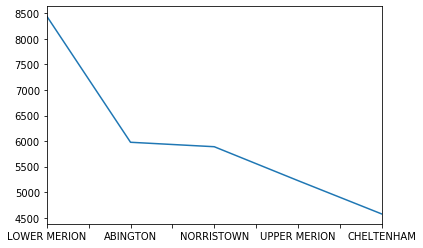

In [327]:
df['twp'].value_counts().head(5).plot()

# Q3) What are the top 5 'title' for 911 calls?

In [328]:
df['title'].value_counts().head(5)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

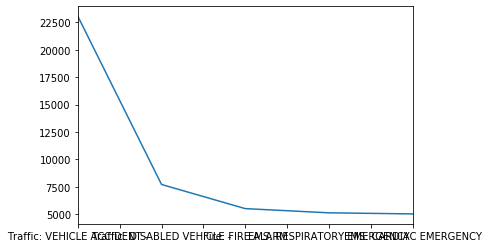

In [329]:
df['title'].value_counts().head(5).plot()

# Q4)How Many calls w.r.t 3 "Resons"?

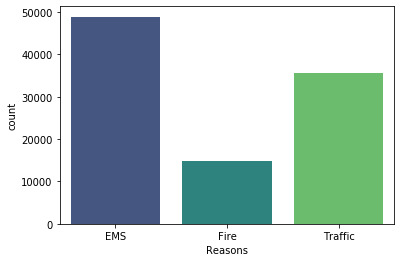

In [330]:
sns.countplot(x='Reasons',data=df,palette='viridis')

# Q5) Data analysis w.r.t day/Month/hour

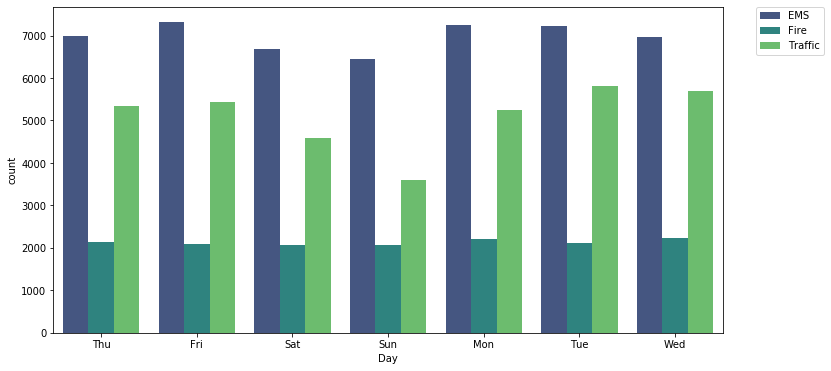

In [331]:
plt.figure(figsize=(12,6))
sns.countplot(x='Day',data=df,palette='viridis',hue='Reasons')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

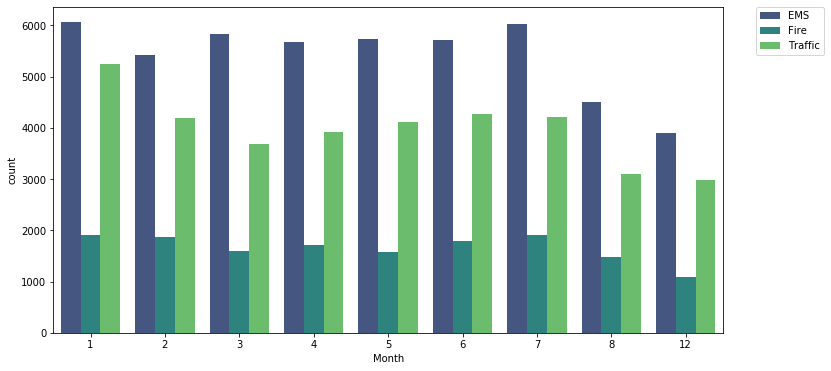

In [332]:
plt.figure(figsize=(12,6))
sns.countplot(x='Month',data=df,palette='viridis',hue='Reasons')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

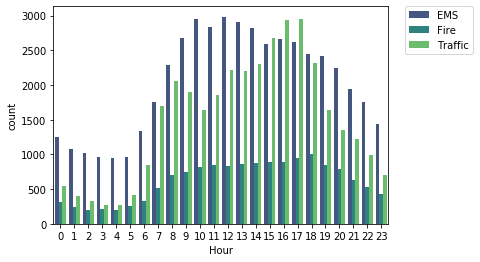

In [333]:
sns.countplot(x='Hour',data=df,palette='viridis',hue='Reasons')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


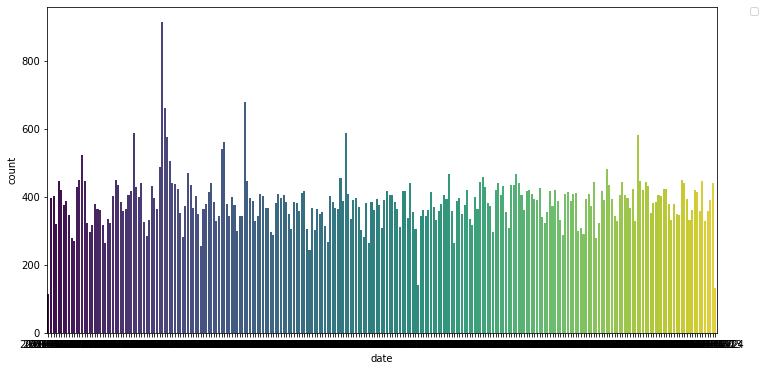

In [334]:
plt.figure(figsize=(12,6))
sns.countplot(x='date',data=df,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Q6) Analysing Data using date

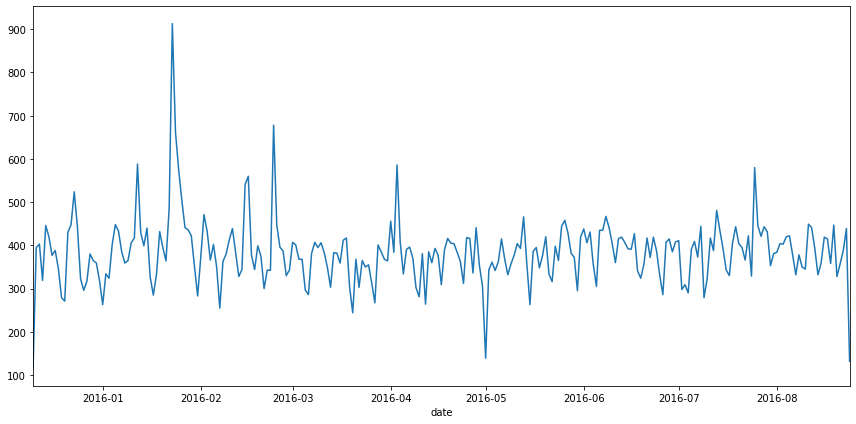

In [335]:
plt.figure(figsize=(12,6))
df.groupby('date').count()['twp'].plot()
plt.tight_layout()

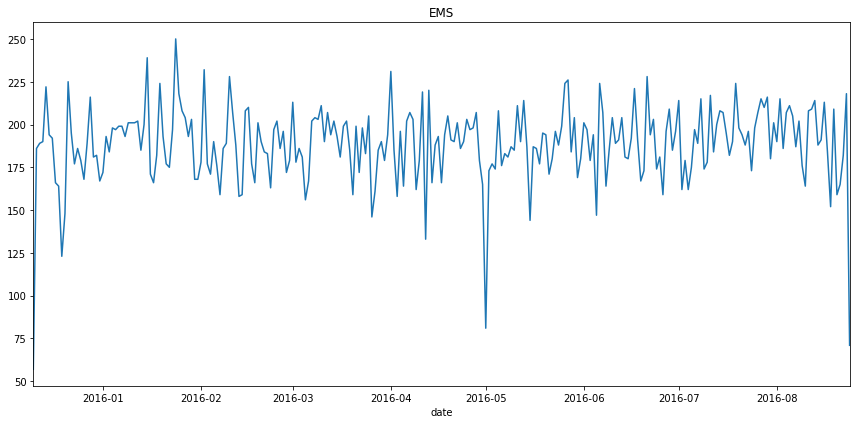

In [336]:
plt.figure(figsize=(12,6))
df[df['Reasons']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

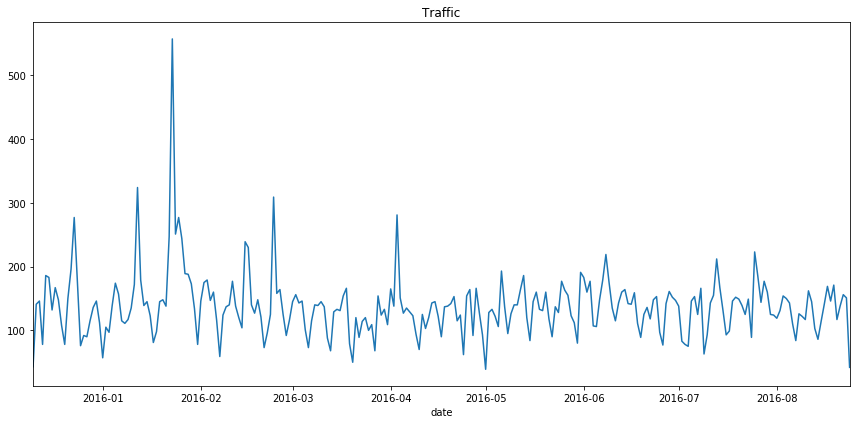

In [337]:
plt.figure(figsize=(12,6))
df[df['Reasons']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

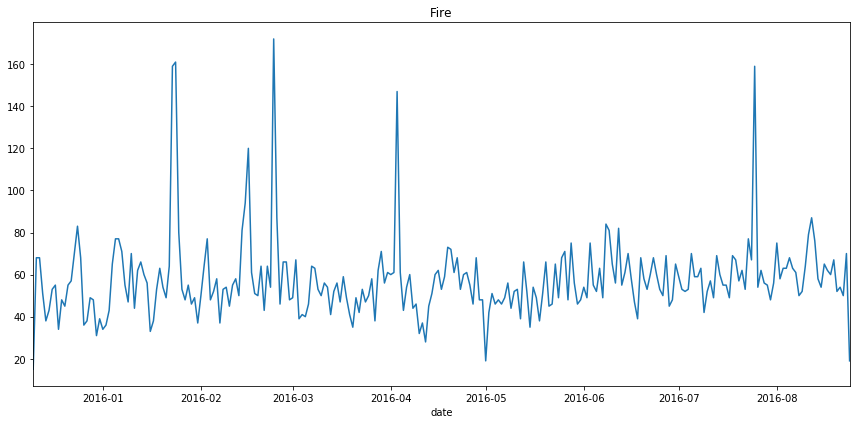

In [338]:
plt.figure(figsize=(12,6))
df[df['Reasons']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

# Analysis using Heatmap

# 1)

In [339]:
dayhour = df.groupby(by=['Day','Hour']).count()['Reasons'].unstack()
dayhour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


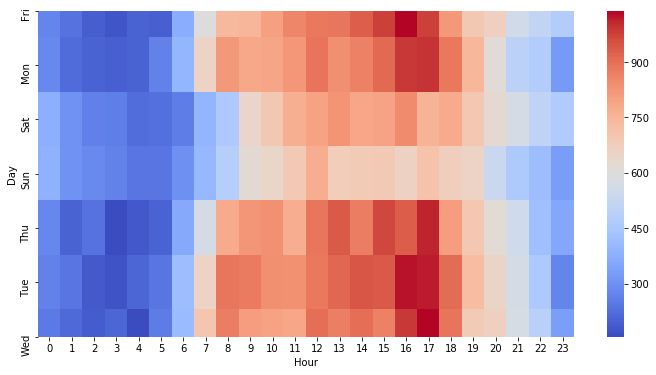

In [342]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='coolwarm')

<Figure size 864x432 with 0 Axes>

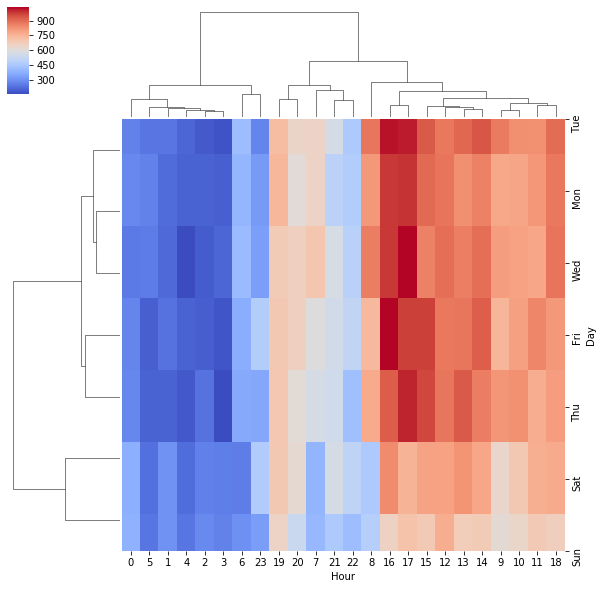

In [343]:
plt.figure(figsize=(12,6))
sns.clustermap(dayhour,cmap='coolwarm')

# 2)

In [345]:
daymonth = df.groupby(by=['Day','Month']).count()['Reasons'].unstack()
daymonth

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


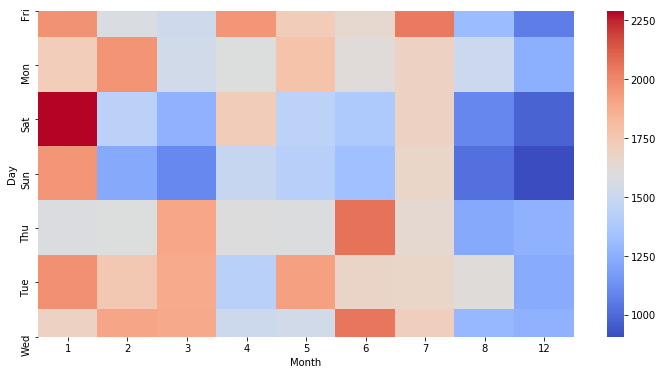

In [347]:
plt.figure(figsize=(12,6))
sns.heatmap(daymonth,cmap='coolwarm')

<Figure size 864x432 with 0 Axes>

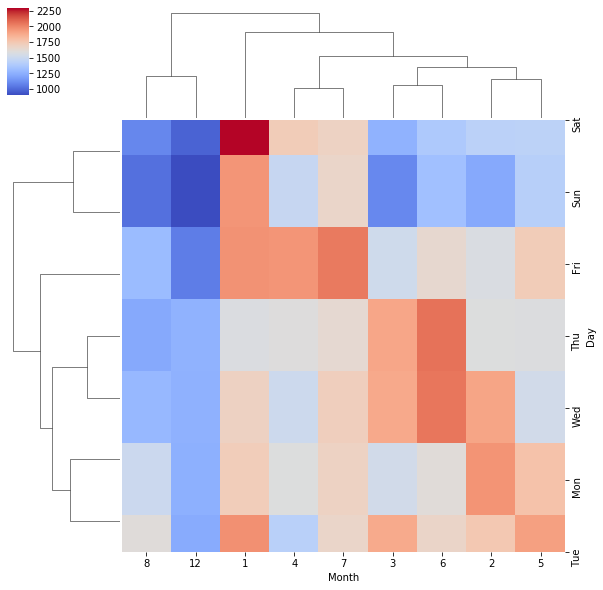

In [348]:
plt.figure(figsize=(12,6))
sns.clustermap(daymonth,cmap='coolwarm')